In [ ]:
!pip install scikit-fuzzy > /dev/null 2>&1

Predicted Stress Level: 36.31648936170212


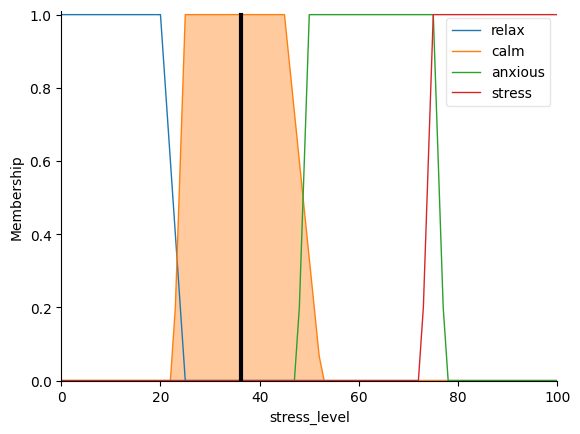

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the fuzzy variables (antecedents)
GSR = ctrl.Antecedent(np.arange(0, 11, 0.01), 'GSR')  # Galvanic Skin Response (0 to 10)
body_temp = ctrl.Antecedent(np.arange(34.9, 41, 0.01), 'body_temp')  # Body Temperature (35 to 40 °C)
heart_rate = ctrl.Antecedent(np.arange(50, 151, 1), 'heart_rate')  # Heart Rate (50 to 150 BPM)

# Define the fuzzy variable (consequent)
stress_level = ctrl.Consequent(np.arange(0, 101, 1), 'stress_level')  # Stress Level (0 to 100%)

# Define membership functions for GSR
GSR['low'] = fuzz.trapmf(GSR.universe, [0, 0,  1.7, 2])
GSR['medium'] = fuzz.trapmf(GSR.universe, [1.7, 2, 4, 4.3])
GSR['high'] = fuzz.trapmf(GSR.universe, [4, 4.3, 6, 6.3 ])
GSR['very_high'] = fuzz.trapmf(GSR.universe, [6, 6.3, 10, 10])

# Define membership functions for body temperature
body_temp['low'] = fuzz.trapmf(body_temp.universe, [30, 30, 32, 33])
body_temp['medium'] = fuzz.trapmf(body_temp.universe, [32, 33, 34.5, 35.5])
body_temp['high'] = fuzz.trapmf(body_temp.universe, [35, 35.5, 36.5, 37])
body_temp['very_high'] = fuzz.trapmf(body_temp.universe, [36.5, 37.5, 40, 40])

# Define membership functions for heart rate
heart_rate['low'] = fuzz.trapmf(heart_rate.universe, [50, 50 , 65, 70])
heart_rate['medium'] = fuzz.trapmf(heart_rate.universe, [65, 70, 85, 90])
heart_rate['high'] = fuzz.trapmf(heart_rate.universe, [85, 90, 95, 100])
heart_rate['very_high'] = fuzz.trapmf(heart_rate.universe, [95, 100, 150, 150 ])

# Define membership functions for stress level
stress_level['relax'] = fuzz.trapmf(stress_level.universe, [0, 0, 20, 25])
stress_level['calm'] = fuzz.trapmf(stress_level.universe, [22.5, 25, 45, 52.5])
stress_level['anxious'] = fuzz.trapmf(stress_level.universe, [47.5, 50, 75, 77.5])
stress_level['stress'] = fuzz.trapmf(stress_level.universe, [72.5, 75, 100, 100])

# Define the fuzzy rules based on the provided table
rule1 = ctrl.Rule(GSR['low'] & body_temp['low'] & heart_rate['low'], stress_level['relax'])
rule2 = ctrl.Rule(GSR['low'] & body_temp['low'] & heart_rate['medium'], stress_level['anxious'])
rule3 = ctrl.Rule(GSR['low'] & body_temp['low'] & heart_rate['high'], stress_level['anxious'])
rule4 = ctrl.Rule(GSR['low'] & body_temp['low'] & heart_rate['very_high'], stress_level['anxious'])

rule5 = ctrl.Rule(GSR['low'] & body_temp['medium'] & heart_rate['low'], stress_level['relax'])
rule6 = ctrl.Rule(GSR['low'] & body_temp['medium'] & heart_rate['medium'], stress_level['calm'])
rule7 = ctrl.Rule(GSR['low'] & body_temp['medium'] & heart_rate['high'], stress_level['anxious'])
rule8 = ctrl.Rule(GSR['low'] & body_temp['medium'] & heart_rate['very_high'], stress_level['anxious'])

rule9 = ctrl.Rule(GSR['low'] & body_temp['high'] & heart_rate['low'], stress_level['relax'])
rule10 = ctrl.Rule(GSR['low'] & body_temp['high'] & heart_rate['medium'], stress_level['calm'])
rule11 = ctrl.Rule(GSR['low'] & body_temp['high'] & heart_rate['high'], stress_level['calm'])
rule12 = ctrl.Rule(GSR['low'] & body_temp['high'] & heart_rate['very_high'], stress_level['anxious'])

rule13 = ctrl.Rule(GSR['low'] & body_temp['very_high'] & heart_rate['low'], stress_level['relax'])
rule14 = ctrl.Rule(GSR['low'] & body_temp['very_high'] & heart_rate['medium'], stress_level['relax'])
rule15 = ctrl.Rule(GSR['low'] & body_temp['very_high'] & heart_rate['high'], stress_level['calm'])
rule16 = ctrl.Rule(GSR['low'] & body_temp['very_high'] & heart_rate['very_high'], stress_level['anxious'])

rule17 = ctrl.Rule(GSR['medium'] & body_temp['low'] & heart_rate['low'], stress_level['anxious'])
rule18 = ctrl.Rule(GSR['medium'] & body_temp['low'] & heart_rate['medium'], stress_level['anxious'])
rule19 = ctrl.Rule(GSR['medium'] & body_temp['low'] & heart_rate['high'], stress_level['anxious'])
rule20 = ctrl.Rule(GSR['medium'] & body_temp['low'] & heart_rate['very_high'], stress_level['stress'])

rule21 = ctrl.Rule(GSR['medium'] & body_temp['medium'] & heart_rate['low'], stress_level['calm'])
rule22 = ctrl.Rule(GSR['medium'] & body_temp['medium'] & heart_rate['medium'], stress_level['calm'])
rule23 = ctrl.Rule(GSR['medium'] & body_temp['medium'] & heart_rate['high'], stress_level['anxious'])
rule24 = ctrl.Rule(GSR['medium'] & body_temp['medium'] & heart_rate['very_high'], stress_level['anxious'])

rule25 = ctrl.Rule(GSR['medium'] & body_temp['high'] & heart_rate['low'], stress_level['calm'])
rule26 = ctrl.Rule(GSR['medium'] & body_temp['high'] & heart_rate['medium'], stress_level['calm'])
rule27 = ctrl.Rule(GSR['medium'] & body_temp['high'] & heart_rate['high'], stress_level['calm'])
rule28 = ctrl.Rule(GSR['medium'] & body_temp['high'] & heart_rate['very_high'], stress_level['anxious'])

rule29 = ctrl.Rule(GSR['medium'] & body_temp['very_high'] & heart_rate['low'], stress_level['relax'])
rule30 = ctrl.Rule(GSR['medium'] & body_temp['very_high'] & heart_rate['medium'], stress_level['calm'])
rule31 = ctrl.Rule(GSR['medium'] & body_temp['very_high'] & heart_rate['high'], stress_level['calm'])
rule32 = ctrl.Rule(GSR['medium'] & body_temp['very_high'] & heart_rate['very_high'], stress_level['relax'])

rule33 = ctrl.Rule(GSR['high'] & body_temp['low'] & heart_rate['low'], stress_level['anxious'])
rule34 = ctrl.Rule(GSR['high'] & body_temp['low'] & heart_rate['medium'], stress_level['calm'])
rule35 = ctrl.Rule(GSR['high'] & body_temp['low'] & heart_rate['high'], stress_level['anxious'])
rule36 = ctrl.Rule(GSR['high'] & body_temp['low'] & heart_rate['very_high'], stress_level['anxious'])

rule37 = ctrl.Rule(GSR['high'] & body_temp['medium'] & heart_rate['low'], stress_level['anxious'])
rule38 = ctrl.Rule(GSR['high'] & body_temp['medium'] & heart_rate['medium'], stress_level['anxious'])
rule39 = ctrl.Rule(GSR['high'] & body_temp['medium'] & heart_rate['high'], stress_level['anxious'])
rule40 = ctrl.Rule(GSR['high'] & body_temp['medium'] & heart_rate['very_high'], stress_level['anxious'])

rule41 = ctrl.Rule(GSR['high'] & body_temp['high'] & heart_rate['low'], stress_level['calm'])
rule42 = ctrl.Rule(GSR['high'] & body_temp['high'] & heart_rate['medium'], stress_level['calm'])
rule43 = ctrl.Rule(GSR['high'] & body_temp['high'] & heart_rate['high'], stress_level['anxious'])
rule44 = ctrl.Rule(GSR['high'] & body_temp['high'] & heart_rate['very_high'], stress_level['anxious'])

rule45 = ctrl.Rule(GSR['high'] & body_temp['very_high'] & heart_rate['low'], stress_level['calm'])
rule46 = ctrl.Rule(GSR['high'] & body_temp['very_high'] & heart_rate['medium'], stress_level['calm'])
rule47 = ctrl.Rule(GSR['high'] & body_temp['very_high'] & heart_rate['high'], stress_level['anxious'])
rule48 = ctrl.Rule(GSR['high'] & body_temp['very_high'] & heart_rate['very_high'], stress_level['stress'])

rule49 = ctrl.Rule(GSR['very_high'] & body_temp['low'] & heart_rate['low'], stress_level['anxious'])
rule50 = ctrl.Rule(GSR['very_high'] & body_temp['low'] & heart_rate['medium'], stress_level['anxious'])
rule51 = ctrl.Rule(GSR['very_high'] & body_temp['low'] & heart_rate['high'], stress_level['stress'])
rule52 = ctrl.Rule(GSR['very_high'] & body_temp['low'] & heart_rate['very_high'], stress_level['anxious'])

rule53 = ctrl.Rule(GSR['very_high'] & body_temp['medium'] & heart_rate['low'], stress_level['anxious'])
rule54 = ctrl.Rule(GSR['very_high'] & body_temp['medium'] & heart_rate['medium'], stress_level['anxious'])
rule55 = ctrl.Rule(GSR['very_high'] & body_temp['medium'] & heart_rate['high'], stress_level['anxious'])
rule56 = ctrl.Rule(GSR['very_high'] & body_temp['medium'] & heart_rate['very_high'], stress_level['anxious'])

rule57 = ctrl.Rule(GSR['very_high'] & body_temp['high'] & heart_rate['low'], stress_level['anxious'])
rule58 = ctrl.Rule(GSR['very_high'] & body_temp['high'] & heart_rate['medium'], stress_level['calm'])
rule59 = ctrl.Rule(GSR['very_high'] & body_temp['high'] & heart_rate['high'], stress_level['anxious'])
rule60 = ctrl.Rule(GSR['very_high'] & body_temp['high'] & heart_rate['very_high'], stress_level['stress'])

rule61 = ctrl.Rule(GSR['very_high'] & body_temp['very_high'] & heart_rate['low'], stress_level['calm'])
rule62 = ctrl.Rule(GSR['very_high'] & body_temp['very_high'] & heart_rate['medium'], stress_level['calm'])
rule63 = ctrl.Rule(GSR['very_high'] & body_temp['very_high'] & heart_rate['high'], stress_level['anxious'])
rule64 = ctrl.Rule(GSR['very_high'] & body_temp['very_high'] & heart_rate['very_high'], stress_level['stress'])

# Additional rules need to be added here to cover all combinations

# Create a control system using the defined rules
gsr_low = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16]
gsr_medium = [rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28, rule29, rule30, rule31, rule32]
gsr_high = [rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40, rule41, rule42, rule43, rule44, rule45, rule46, rule47, rule48]
gsr_veryhigh = [rule49, rule50, rule51, rule52, rule53, rule54, rule55, rule56, rule57, rule58, rule59, rule60, rule61, rule62, rule63, rule64]
rules = gsr_low + gsr_medium + gsr_high + gsr_veryhigh
stress_ctrl = ctrl.ControlSystem(rules)

# Create a simulation object for the control system
stress_sim = ctrl.ControlSystemSimulation(stress_ctrl)


gsr = 2.14
temp = 38.21
hr = 79.23

stress_sim.input['GSR'] = gsr
stress_sim.input['body_temp'] = temp
stress_sim.input['heart_rate'] = hr

# Compute the output stress level
stress_sim.compute()

# Print and visualize the stress level
print(f"Predicted Stress Level: {stress_sim.output['stress_level']}")
stress_level.view(sim=stress_sim)